**AIR QUALITY HEALTH IMPACT PREDICTION**

air quality.avif

**Using classification algorithms for predicting health impactness becaues of air quality. This dataset contains comprehensive information on the air quality and its impact on public health for 5,811 records. It includes variables such as air quality index (AQI), concentrations of various pollutants, weather conditions, and health impact metrics. The target variable is the health impact class, which categorizes the health impact based on the air quality and other related factors.**

* **1.** Importing necessary modules for data loading,EDA process,data preprocessing,data transformation and splitting,model implementation and performance measuring

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

* **2.** Collecting and studying dataset for further processing

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets-2024july/Projects/air_quality_health_impact_data.csv')
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [ ]:
df.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

* **3.** EDA and Data Preprocessing

In [ ]:
df.isna().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


*Checking datatype of features and target*

In [ ]:
df.dtypes

,0
RecordID,int64
AQI,float64
PM10,float64
PM2_5,float64
NO2,float64
SO2,float64
O3,float64
Temperature,float64
Humidity,float64
WindSpeed,float64


*Visualization*

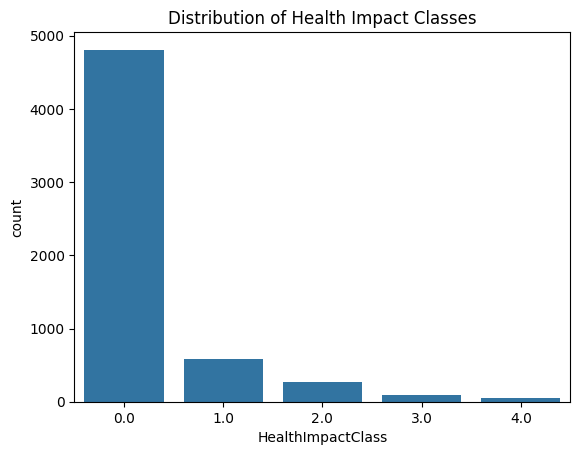

In [ ]:
sns.countplot(x='HealthImpactClass', data=df)
plt.title('Distribution of Health Impact Classes')
plt.show()

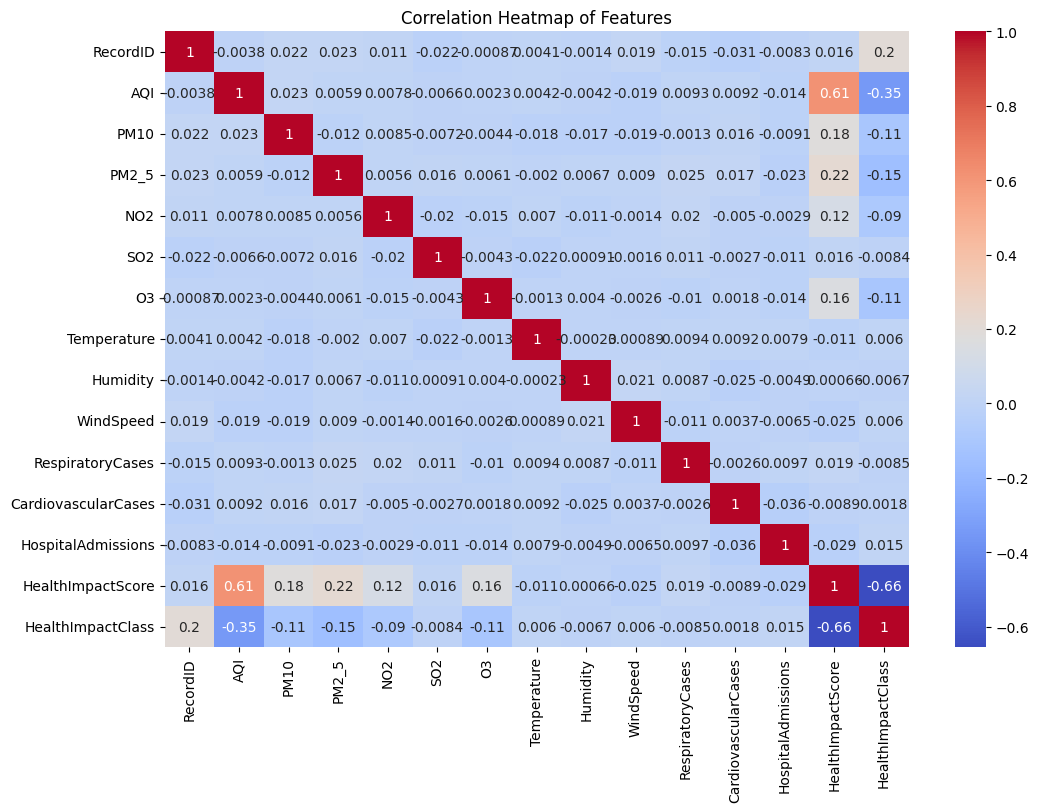

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

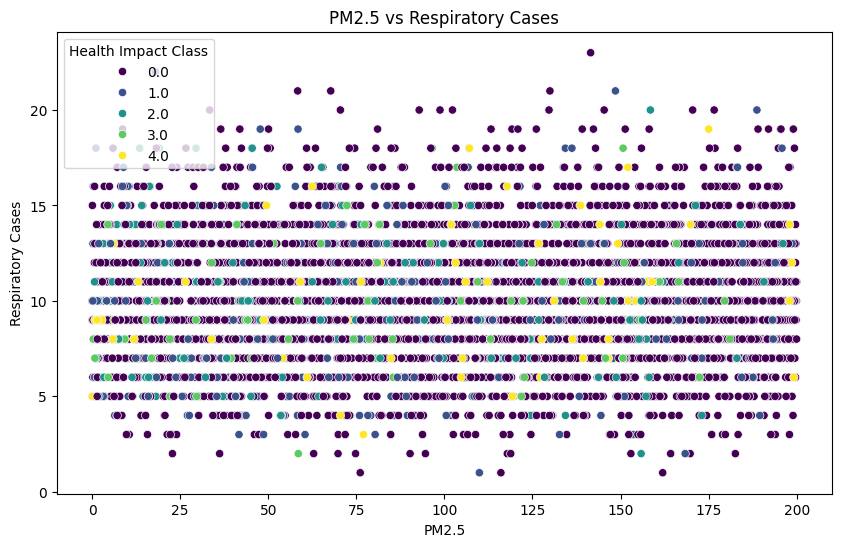

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2_5', y='RespiratoryCases', hue='HealthImpactClass', palette='viridis', data=df)
plt.title('PM2.5 vs Respiratory Cases')
plt.xlabel('PM2.5')
plt.ylabel('Respiratory Cases')
plt.legend(title='Health Impact Class')
plt.show()

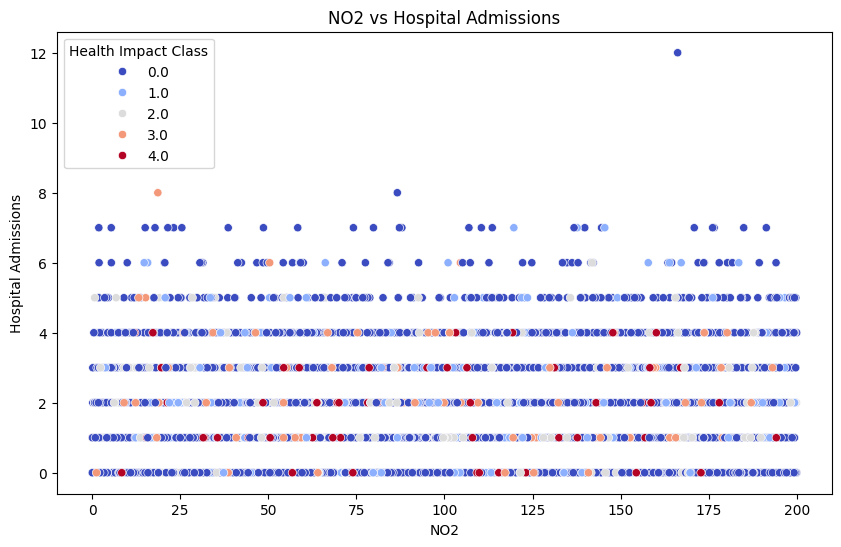

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2', y='HospitalAdmissions', hue='HealthImpactClass', palette='coolwarm', data=df)
plt.title('NO2 vs Hospital Admissions')
plt.xlabel('NO2')
plt.ylabel('Hospital Admissions')
plt.legend(title='Health Impact Class')
plt.show()

*dropping RecordID : irrelevant data*

In [ ]:
df.drop('RecordID',axis=1,inplace=True)

*dropping HealthImpactScore : Target variable for regression tasks*

In [ ]:
df.drop('HealthImpactScore',inplace=True,axis=1)

*Initializing independent and dependent variable*

In [ ]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

*scaling features to range 0-1*

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(X)

*Splitting Data for training and testing*

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=2)
x_train.shape,y_train.shape

((4067, 12), (4067,))

* **4.** Building Models

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rdf=RandomForestClassifier()
ada=AdaBoostClassifier()
gdb=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[knn,svc,nb,dtc,ada,gdb,xgb,rdf]

In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred1=model.predict(x_test)
  print('\n------Model------\n',model)
  print(classification_report(y_test,y_pred1,zero_division=0))


------Model------
 KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1418
         1.0       0.54      0.27      0.36       182
         2.0       0.84      0.17      0.28        94
         3.0       0.00      0.00      0.00        27
         4.0       0.00      0.00      0.00        23

    accuracy                           0.84      1744
   macro avg       0.45      0.29      0.31      1744
weighted avg       0.80      0.84      0.80      1744


------Model------
 SVC()
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1418
         1.0       0.67      0.74      0.70       182
         2.0       0.60      0.29      0.39        94
         3.0       0.00      0.00      0.00        27
         4.0       0.00      0.00      0.00        23

    accuracy                           0.90      1744
   macro avg       0.44      0.40      0.41      1744
weighted

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



------Model------
 AdaBoostClassifier()
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      1418
         1.0       0.47      0.55      0.51       182
         2.0       0.30      0.11      0.16        94
         3.0       0.00      0.00      0.00        27
         4.0       0.00      0.00      0.00        23

    accuracy                           0.84      1744
   macro avg       0.34      0.32      0.32      1744
weighted avg       0.80      0.84      0.82      1744


------Model------
 GradientBoostingClassifier()
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1418
         1.0       0.65      0.67      0.66       182
         2.0       0.62      0.37      0.47        94
         3.0       0.33      0.11      0.17        27
         4.0       0.00      0.00      0.00        23

    accuracy                           0.88      1744
   macro avg       0.51      0.43      0.

* **5.** Oversampling data to remove imbalance

In [ ]:
y.value_counts()

,count
HealthImpactClass,
0.0,4808
1.0,579
2.0,273
3.0,95
4.0,56


In [ ]:
from imblearn.over_sampling import SMOTE
osl=SMOTE(random_state=1)
x_os,y_os=osl.fit_resample(X,y)
y_os.value_counts()

,count
HealthImpactClass,
0.0,4808
1.0,4808
3.0,4808
2.0,4808
4.0,4808


In [ ]:
x_os_scaled=scaler.fit_transform(x_os)
x_os_train,x_os_test,y_os_train,y_os_test=train_test_split(x_os_scaled,y_os,random_state=2,test_size=0.3)
x_os_train.shape,y_os_train.shape

((16828, 12), (16828,))

In [ ]:
for model in models:
  model.fit(x_os_train,y_os_train)
  y_pred2=model.predict(x_os_test)
  print('\n------Model------\n',model)
  print(classification_report(y_os_test,y_pred2,zero_division=0))


------Model------
 KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.70      1471
         1.0       0.86      0.98      0.92      1376
         2.0       0.91      0.99      0.95      1452
         3.0       0.90      1.00      0.94      1464
         4.0       0.89      1.00      0.94      1449

    accuracy                           0.90      7212
   macro avg       0.91      0.90      0.89      7212
weighted avg       0.91      0.90      0.89      7212


------Model------
 SVC()
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      1471
         1.0       0.91      0.91      0.91      1376
         2.0       0.96      0.87      0.91      1452
         3.0       0.94      0.99      0.96      1464
         4.0       0.92      0.99      0.96      1449

    accuracy                           0.92      7212
   macro avg       0.92      0.92      0.92      7212
weighted

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



------Model------
 AdaBoostClassifier()
              precision    recall  f1-score   support

         0.0       0.58      0.59      0.59      1471
         1.0       0.42      0.61      0.49      1376
         2.0       0.40      0.28      0.33      1452
         3.0       0.38      0.29      0.33      1464
         4.0       0.54      0.59      0.56      1449

    accuracy                           0.47      7212
   macro avg       0.46      0.47      0.46      7212
weighted avg       0.46      0.47      0.46      7212


------Model------
 GradientBoostingClassifier()
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.77      1471
         1.0       0.73      0.85      0.79      1376
         2.0       0.85      0.79      0.82      1452
         3.0       0.87      0.74      0.80      1464
         4.0       0.77      0.90      0.83      1449

    accuracy                           0.80      7212
   macro avg       0.81      0.80      0.

* **6.** Feature Selection

*checking chi square value of each input for feature selection*

In [ ]:
x_os.columns

Index(['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity',
       'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions'],
      dtype='object')

In [ ]:
features=['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity','WindSpeed', 'RespiratoryCases', 'CardiovascularCases','HospitalAdmissions']
ch_values,p_values=chi2(x_os_scaled,y_os)
chi2_results = pd.DataFrame({'Feature': features, 'Chi2 Score': ch_values, 'p-value': p_values})
print(chi2_results)

                Feature   Chi2 Score       p-value
0                   AQI  1920.753738  0.000000e+00
1                  PM10   304.496359  1.161050e-64
2                 PM2_5   455.388649  2.970754e-97
3                   NO2    63.701973  4.828816e-13
4                   SO2    21.434443  2.596537e-04
5                    O3   138.222298  6.779480e-29
6           Temperature    10.099540  3.878391e-02
7              Humidity    28.412764  1.028662e-05
8             WindSpeed    14.141328  6.857391e-03
9      RespiratoryCases     7.746435  1.013208e-01
10  CardiovascularCases     7.109225  1.302275e-01
11   HospitalAdmissions    43.660033  7.548325e-09


*dropping columns with p-value greater than 0.05*

In [ ]:
x_os.drop(['RespiratoryCases','CardiovascularCases'],axis=1,inplace=True)

In [ ]:
scaler=MinMaxScaler()
x_new_scaled=scaler.fit_transform(x_os)

In [ ]:
x_new_train,x_new_test,y_new_train,y_new_test=train_test_split(x_new_scaled,y_os,test_size=0.3,random_state=2)
x_new_train.shape,y_new_train.shape

((16828, 10), (16828,))

In [ ]:
acc=[]
for model in models:
  model.fit(x_new_train,y_new_train)
  y_pred3=model.predict(x_new_test)
  print('\n------Model------\n',model)
  print(classification_report(y_new_test,y_pred3,zero_division=0))
  acc.append(accuracy_score(y_new_test,y_pred3))


------Model------
 KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71      1471
         1.0       0.87      0.97      0.92      1376
         2.0       0.91      0.99      0.95      1452
         3.0       0.89      1.00      0.94      1464
         4.0       0.88      1.00      0.94      1449

    accuracy                           0.90      7212
   macro avg       0.91      0.90      0.89      7212
weighted avg       0.91      0.90      0.89      7212


------Model------
 SVC()
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1471
         1.0       0.89      0.91      0.90      1376
         2.0       0.95      0.83      0.88      1452
         3.0       0.93      0.96      0.94      1464
         4.0       0.90      0.99      0.94      1449

    accuracy                           0.90      7212
   macro avg       0.90      0.90      0.90      7212
weighted

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



------Model------
 AdaBoostClassifier()
              precision    recall  f1-score   support

         0.0       0.57      0.59      0.58      1471
         1.0       0.38      0.65      0.48      1376
         2.0       0.33      0.17      0.23      1452
         3.0       0.36      0.23      0.28      1464
         4.0       0.53      0.62      0.58      1449

    accuracy                           0.45      7212
   macro avg       0.44      0.45      0.43      7212
weighted avg       0.44      0.45      0.43      7212


------Model------
 GradientBoostingClassifier()
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1471
         1.0       0.73      0.86      0.79      1376
         2.0       0.85      0.77      0.81      1452
         3.0       0.85      0.73      0.78      1464
         4.0       0.76      0.88      0.81      1449

    accuracy                           0.79      7212
   macro avg       0.79      0.79      0.

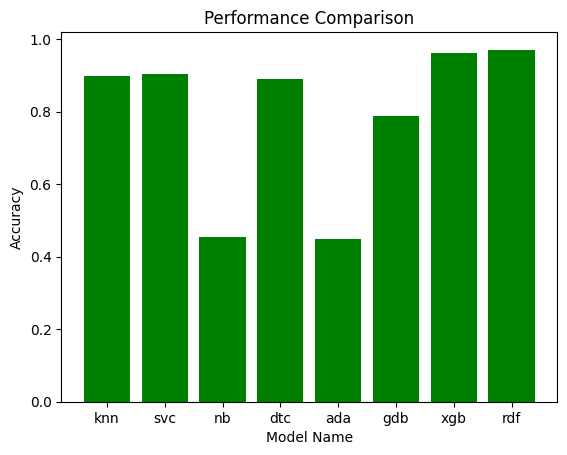

In [ ]:
model_names=['knn','svc','nb','dtc','ada','gdb','xgb','rdf']
plt.bar(model_names,acc,color='g')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()

***Inference: Since RandomForset is the best based on its good performance. Thus it is taken as the solution model***

* **7.** Hyper-Parameter Tuning

In [ ]:
params={'n_estimators':[10,50,100],
        'random_state':[1,2,3,4,5],
        "criterion":['gini', 'entropy', 'log_loss']}

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf=RandomizedSearchCV(rdf,params,cv=7,scoring='accuracy')
clf.fit(x_new_train,y_new_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [1, 2, 3, 4, 5]},
                   scoring='accuracy')

In [ ]:
clf.best_params_

{'random_state': 2, 'n_estimators': 100, 'criterion': 'log_loss'}

In [ ]:
pred=clf.predict(x_new_test)
print(classification_report(y_new_test,pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      1471
         1.0       0.94      0.97      0.95      1376
         2.0       1.00      0.97      0.98      1452
         3.0       1.00      0.99      0.99      1464
         4.0       0.98      1.00      0.99      1449

    accuracy                           0.97      7212
   macro avg       0.97      0.97      0.97      7212
weighted avg       0.97      0.97      0.97      7212



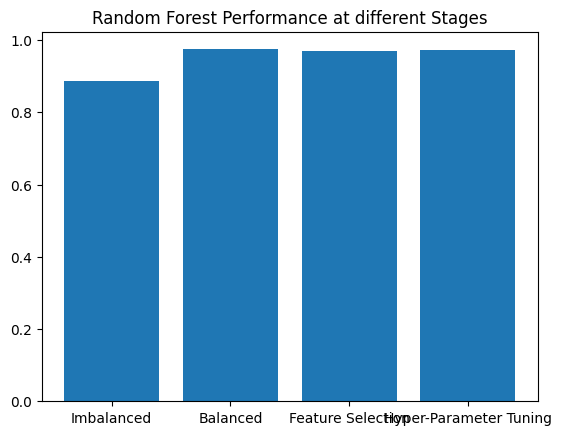

In [ ]:
cases=['Imbalanced','Balanced','Feature Selection','Hyper-Parameter Tuning']
test=[y_test,y_os_test,y_new_test,y_new_test]
preds=[y_pred1,y_pred2,y_pred3,pred]
scores=[]
for i in range(4):
  scores.append(accuracy_score(test[i],preds[i]))
plt.title('Random Forest Performance at different Stages')
plt.bar(cases,scores)
plt.show()

**Saving the model to create GUI**

In [ ]:
import pickle
pickle.dump(clf,open('AirQuality.sav','wb'))
pickle.dump(scaler,open('AQl_scaler.sav','wb'))